# Linear Regression Model



Linear Regression is a simple statistical model that is widely used in Machine Learning tasks for predicting numerical values. It maps the relationship between a dependent variable (called target) and one or more independent variables (called features) by fitting a Linear Equation to the observed data.

Mean Squared Error: 0.20636897275242153


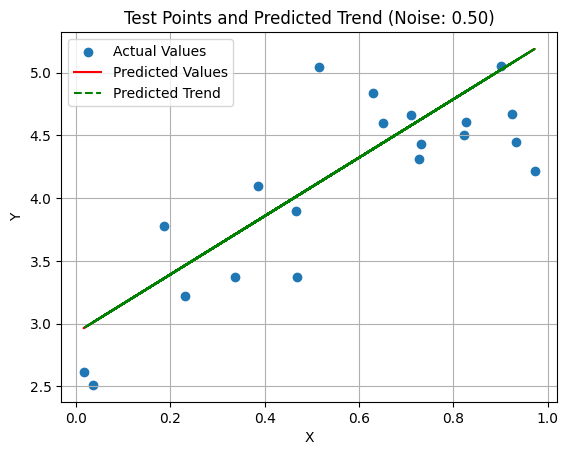

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate 100 random samples (X, Y) with a linear relationship and some noise
num_samples = 100
slope = 2  # Adjust slope for desired linear relationship
intercept = 3  # Adjust intercept for desired position
noise_std = 0.5  # Adjust noise standard deviation for desired variation

X = np.random.rand(num_samples)
y = slope * X + intercept + np.random.normal(scale=noise_std, size=num_samples)

# Create pandas DataFrame
data = {'X': X, 'Y': y}
df = pd.DataFrame(data)

# Split data into training and testing sets
X = df[['X']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the results
plt.scatter(X_test, y_test, label='Actual Values')  # Test points
plt.plot(X_test, y_pred, color='red', label='Predicted Values')  # Regression line

# Calculate the predicted y values for the entire dataset (X) for a smoother line
predicted_y = model.predict(X)

# Plot the predicted line across the entire data range
plt.plot(X, predicted_y, color='green', linestyle='--', label='Predicted Trend')

# Label axes and add a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test Points and Predicted Trend (Noise: {:.2f})'.format(noise_std))

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Logistic Regression Model

Logistic Regression is a statistical method used for building machine learning models where the dependent variable has only two possible outcomes which is 0 or 1/ Yes or No/ True or False.

Accuracy: 0.685
Confusion Matrix:
 [[137   0]
 [ 63   0]]


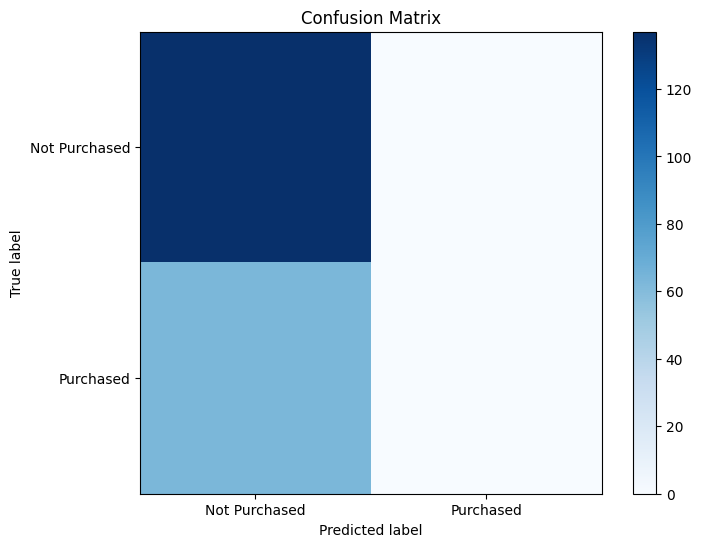

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from warnings import filterwarnings
import matplotlib.pyplot as plt

filterwarnings('ignore')

# Increase sample size to 100
num_samples = 1000

# Generate random data with additional features (modify as needed)
data = {
    'Age': np.random.randint(20, 51, size=num_samples),  # Random ages between 20 and 50
    'Income': np.random.randint(20000, 100001, size=num_samples),  # Random income between 20k and 100k
    'Location': np.random.choice(['Urban', 'Rural'], size=num_samples),  # Categorical location
    'Occupation': np.random.choice(['Professional', 'Student', 'Other'], size=num_samples),  # Categorical occupation
    'Purchased': np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3])  # Purchased with probability of 0.7 (not purchased) and 0.3 (purchased)
}

df = pd.DataFrame(data)

# Separate features and target variable
X = df[['Age', 'Income', 'Location', 'Occupation']]
y = df['Purchased']

# Perform one-hot encoding on categorical features
X = pd.get_dummies(X, columns=['Location', 'Occupation'], drop_first=True) # Use get_dummies to convert categorical features to numerical

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Purchased', 'Purchased'])
plt.yticks(tick_marks, ['Not Purchased', 'Purchased'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Decission Tree

A Decision Tree is a supervised learning algorithm that resembles a flowchart. It is used to make decisions by breaking down a problem into smaller and smaller subproblems based on specific conditions.

Accuracy: 0.665
Confusion Matrix:
 [[131   3]
 [ 64   2]]


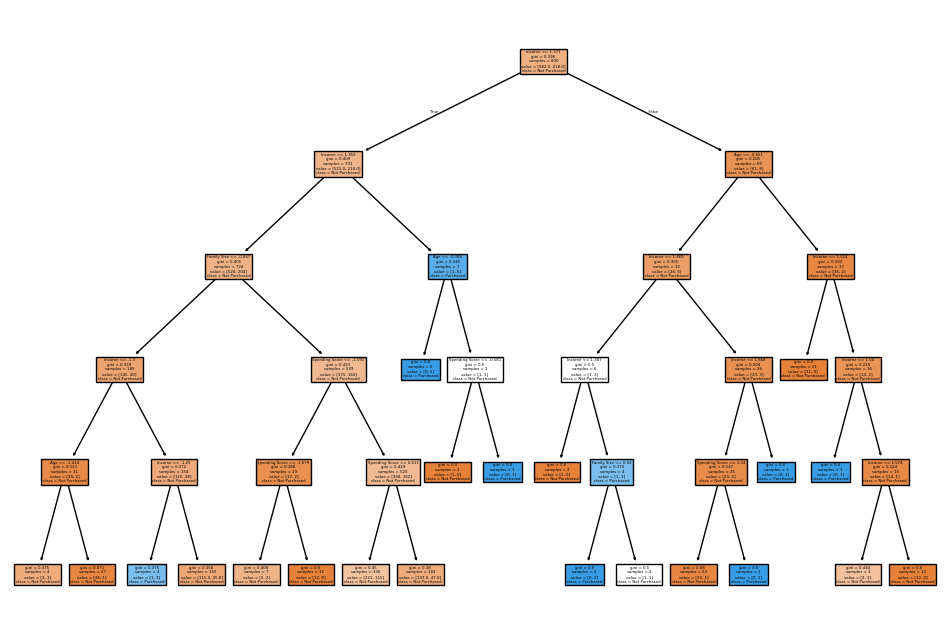

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Increase sample size to 100
num_samples = 1000

# Generate random data with additional features (modify as needed)
data = {
    'Age': np.random.randint(20, 51, size=num_samples),  # Random ages between 20 and 50
    'Income': np.random.randint(20000, 100001, size=num_samples),  # Random income between 20k and 100k
    'Spending Score': np.random.rand(num_samples) * 100,  # Random spending score between 0 and 100
    'Family Size': np.random.randint(1, 5, size=num_samples),  # Random family size between 1 and 4
    'Purchased': np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3])  # Purchased with probability of 0.7 (not purchased) and 0.3 (purchased)
}

df = pd.DataFrame(data)

# Separate features and target variable
X = df[['Age', 'Income', 'Spending Score', 'Family Size']]
y = df['Purchased']

# Feature scaling (recommended for decision trees)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a more complex decision tree
clf = DecisionTreeClassifier(max_depth=5)  # Increase max depth for more complex tree

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.show()

# Naive Bayes Model

Naive Bayes is powerful probabilistic classification algorithm primarily used for text classification tasks. It's based on Bayes theorem which is a fundamental concept in probability.

Accuracy: 0.695
Confusion Matrix:
 [[139   0]
 [ 61   0]]


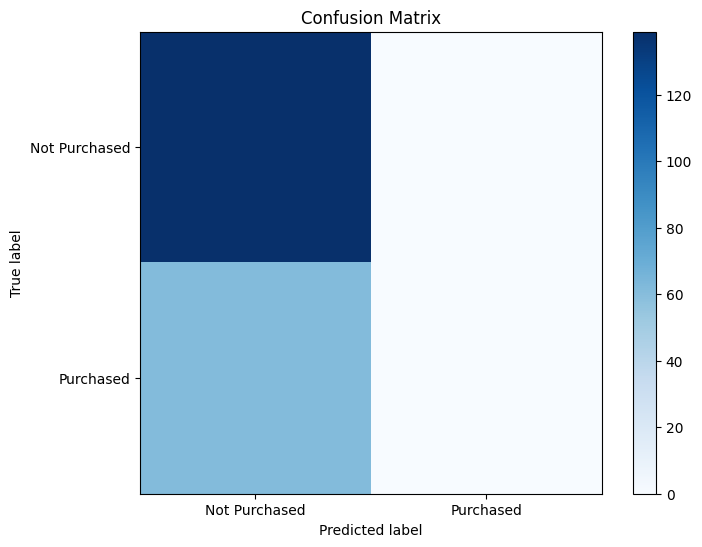

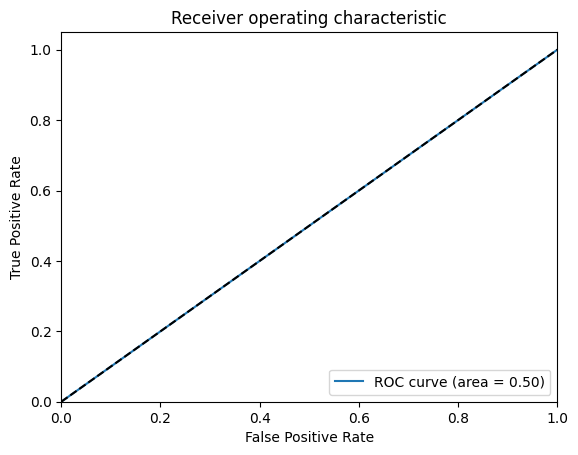

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Increase sample size to 100
num_samples = 1000

# Generate random data with additional features (modify as needed)
data = {
    'Age': np.random.randint(20, 51, size=num_samples),  # Random ages between 20 and 50
    'Income': np.random.randint(20000, 100001, size=num_samples),  # Random income between 20k and 100k
    'Spending Score': np.random.rand(num_samples) * 100,  # Random spending score between 0 and 100
    'Family Size': np.random.randint(1, 5, size=num_samples),  # Random family size between 1 and 4
    'Purchased': np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3])  # Purchased with probability of 0.7 (not purchased) and 0.3 (purchased)
}

df = pd.DataFrame(data)

# Separate features and target variable
X = df[['Age', 'Income', 'Spending Score', 'Family Size']]
y = df['Purchased']

# Feature scaling (recommended for continuous features with Naive Bayes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
clf = GaussianNB()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Purchased', 'Purchased'])
plt.yticks(tick_marks, ['Not Purchased', 'Purchased'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("\n\n")
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine (SVM)

SVM is another powerful supervised Machine Learning algorithm used for both classification and regression tasks. However, it's particularly well-suited for classification problems.

Accuracy: 0.45
Confusion Matrix:
 [[ 9  0]
 [11  0]]


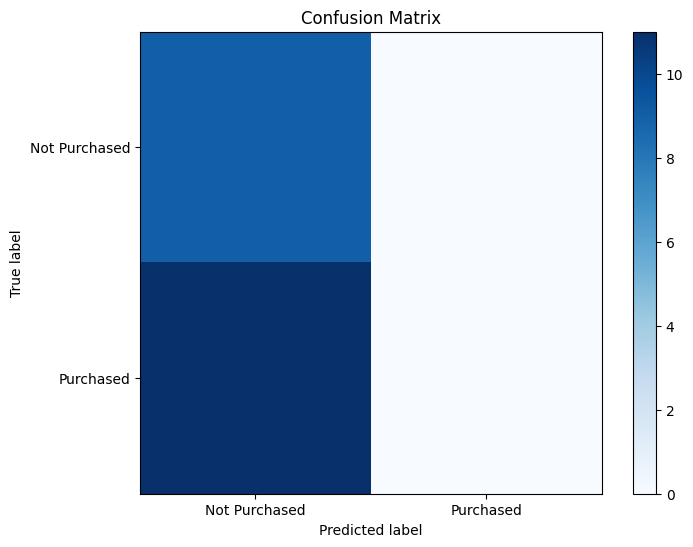

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Increase sample size to 100
num_samples = 100

# Generate random data with additional features (modify as needed)
data = {
    'Age': np.random.randint(20, 51, size=num_samples),  # Random ages between 20 and 50
    'Income': np.random.randint(20000, 100001, size=num_samples),  # Random income between 20k and 100k
    'Spending Score': np.random.rand(num_samples) * 100,  # Random spending score between 0 and 100
    'Family Size': np.random.randint(1, 5, size=num_samples),  # Random family size between 1 and 4
    'Purchased': np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3])  # Purchased with probability of 0.7 (not purchased) and 0.3 (purchased)
}

df = pd.DataFrame(data)

# Separate features and target variable
X = df[['Age', 'Income', 'Spending Score', 'Family Size']]
y = df['Purchased']

# Feature scaling (recommended for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an SVC model (adjust kernel and other parameters as needed)
clf = SVC(kernel='linear')  # Linear kernel for visualization (adjust kernel for complex data)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Purchased', 'Purchased'])
plt.yticks(tick_marks, ['Not Purchased', 'Purchased'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()